In [14]:
import pandas as pd
import os
import csv

import math
import numpy as np
import matplotlib.pyplot as plt

建立代价函数

In [15]:
def computeCost(X, Y, w, b):
    cost = np.sum(np.power((Y-np.dot(X, w.T)-b), 2))/(2*len(X))
    return cost

梯度下降

In [16]:
def gradientDescent(X, Y, theta, iters, learning_rate):
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = X * theta.T - Y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - learning_rate

        theta = temp
        cost[i] = computeCost(X, Y, theta)
        
    return theta, cost

预测函数predict

In [17]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = np.dot(X,w) + b
    return Y_prediction

读取训练集和测试集的csv文件

In [18]:
train_data = pd.read_csv('./airfoil_noise_samples.csv')
test_data = pd.read_csv('./airfoil_noise_test.csv')
train_data.head()

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,2175.611424,15.138865,21.075119,0.088194,66.764401,0.044771,122.365215
1,2962.923620,13.400893,13.200889,0.048462,78.221903,0.011041,129.296236
2,4430.810843,2.164599,13.959536,0.226743,57.053201,0.011499,121.827380
3,4939.695645,13.857682,18.203793,0.021705,23.896377,0.021475,114.998132
4,2193.979785,9.298757,11.007713,0.052737,38.917034,0.001741,125.639641


定义特征和目标变量

In [19]:
X_train = train_data.iloc[:, :-1]
Y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:, -1]

数据归一化，防止数据过拟合

In [20]:
#归一化
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
X_train.head()

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness
0,-0.275324,1.240614,1.602819,-0.558959,0.934190,2.181587
1,0.007620,0.928480,-0.074895,-0.989410,1.631190,-0.232215
2,0.535150,-1.089521,0.086745,0.942044,0.343425,-0.199430
3,0.718034,1.010518,0.991043,-1.279290,-1.673619,0.514487
4,-0.268723,0.191750,-0.542182,-0.943098,-0.759861,-0.897771


In [21]:
#初始化权重和偏执
w = np.zeros(X_train.shape[1])
b = 0

#设置学习率和迭代次数
learning_rate = 0.001
epochs = 4000

In [22]:
#训练模型
m = len(Y_train)
costs = []
for epoch in range(epochs):
    #计算预测值
    Y_pred = np.dot(X_train, w) + b

    cost = (1/2*m)*np.sum(np.power((Y_train-np.dot(X_train, w)-b),2))
    costs.append(cost)
    
    # 计算梯度
    dw = -(1/m) * np.dot(X_train.T, (Y_train - Y_pred))
    db = -(1/m) * np.sum(Y_train - Y_pred)
    
    # 更新权重和偏置
    w = w - learning_rate * dw
    b = b - learning_rate * db

# 测试模型
Y_pred_test = np.dot(X_test, w) + b

画出cost曲线

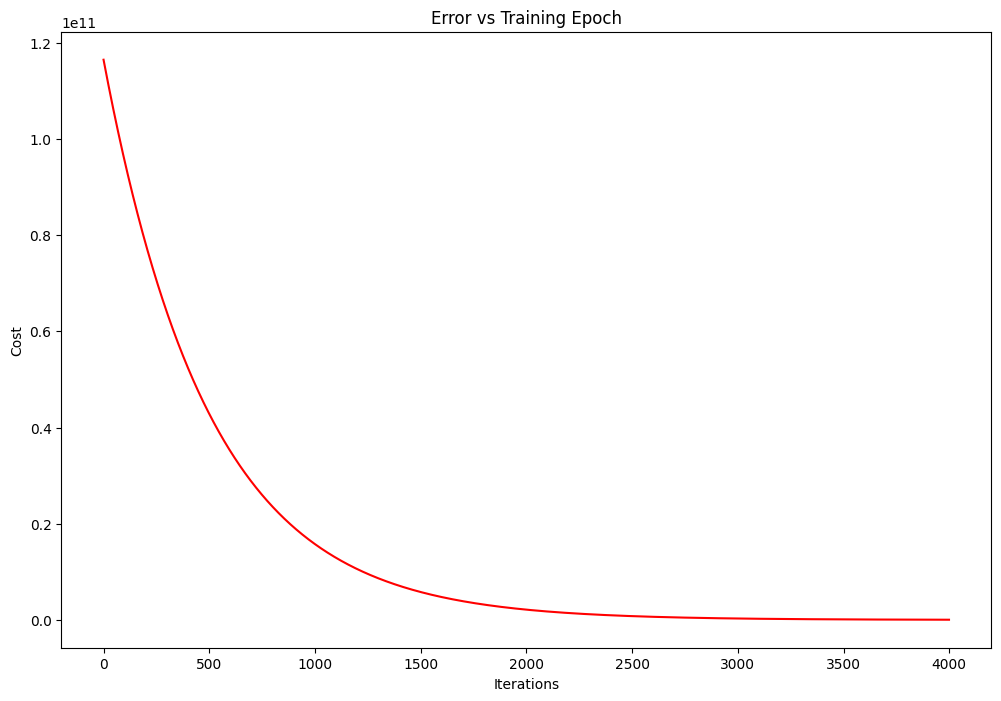

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs), costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()

训练结果点图

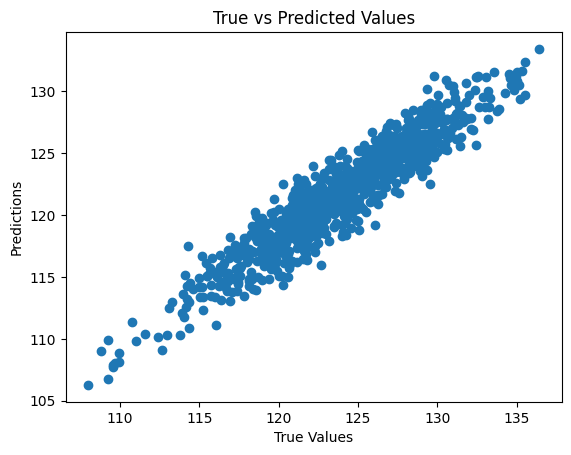

In [24]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

使用R^2分数和MSE来评估模型在测试集上的表现：

In [25]:

mse = np.mean((Y_test - Y_pred_test) ** 2)
r2_score = 1 - np.sum((Y_test - Y_pred_test) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2)

# 输出结果
print(f"MSE on test set: {mse}")
print(f"R^2 Score on test set: {r2_score}")

MSE on test set: 7.605071642425265
R^2 Score on test set: 0.6486305305658426


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
# 计算MSE和R^2评分
mse = mean_squared_error(Y_test, Y_pred_test)
r2 = r2_score(Y_test, Y_pred_test)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 7.605071642425265
R^2 Score: 0.6486305305658426
